In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import nltk
import re
from wordcloud import wordcloud
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential

from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import Conv1D
from keras.layers import MaxPool1D
from keras.layers import LSTM

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score







In [2]:
fake=pd.read_csv("fake.csv")
real=pd.read_csv("true.csv")
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [3]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [4]:
real.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

<AxesSubplot:xlabel='subject', ylabel='count'>

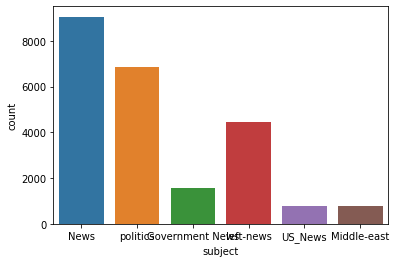

In [5]:
sns.countplot(x='subject',data=fake)

In [59]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [60]:
plt.figure(figsize=(10,6))


<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [62]:
w=fake['text'].tolist()
text=' '.join(fake['text'].tolist())
#type(text)
#text



In [63]:
# wordlcoud=wordcloud().generate(text)
# plt.imshow(wordcloud)

In [64]:
text=' '.join(real['text'].tolist())
real.shape

(21417, 4)

In [65]:
#WASHINGTON(Reuters) is present in real news
#real.text.values

In [66]:
#real.sample(5)

In [6]:
unknon_publishers=[]
for index, row in enumerate(real.text.values):
    try:
        record=row.split('-', maxsplit=1)
        assert(len(record[0])<120)
        record[1]
    except:
        
        unknon_publishers.append(index)
    


In [7]:
len(unknon_publishers)

222

In [8]:
real.iloc[unknon_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [9]:
real=real.drop(8970, axis=0)

In [10]:
publisher=[]
temp_text=[]
for index, row in enumerate(real.text.values):
    
    if index  in unknon_publishers:
        temp_text.append(row)
        publisher.append('unknown')
    else:
        record=row.split('-', maxsplit=1)
        publisher.append(record[0].strip())
        temp_text.append(record[1].strip())
        

In [11]:
real['publisher']=publisher
real['text']=temp_text
real.head()
real.shape

(21416, 5)

In [12]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher'], dtype='object')

In [13]:
empty_fake=[index for index,text in enumerate(fake.text.tolist()) if str(text).strip()=="" ]

In [14]:
#fake.iloc[empty_fake]

In [15]:
#merge title and text together

In [16]:
real['text']=real['title']+" "+real['text']
fake['text']=fake['title']+" "+fake['text']

In [17]:
real['text']=real['text'].apply(lambda x: str(x).lower())
fake['text']=fake['text'].apply(lambda x: str(x).lower())

In [18]:
#preprocessing for text 

In [19]:
real['class']=1
fake['class']=0

In [20]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [21]:
real=real[['text', 'class']]
fake=fake[['text', 'class']]


In [22]:
real.columns


Index(['text', 'class'], dtype='object')

In [23]:
data=real.append(fake)

C:\Users\inaze\AppData\Local\Temp\ipykernel_11000\137480656.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=real.append(fake)


In [24]:
data=pd.concat([real, fake], ignore_index=True)
data.head

<bound method NDFrame.head of                                                     text  class
0      as u.s. budget fight looms, republicans flip t...      1
1      u.s. military to accept transgender recruits o...      1
2      senior u.s. republican senator: 'let mr. muell...      1
3      fbi russia probe helped by australian diplomat...      1
4      trump wants postal service to charge 'much mor...      1
...                                                  ...    ...
44892  mcpain: john mccain furious that iran treated ...      0
44893  justice? yahoo settles e-mail privacy class-ac...      0
44894  sunnistan: us and allied ‘safe zone’ plan to t...      0
44895  how to blow $700 million: al jazeera america f...      0
44896  10 u.s. navy sailors held by iranian military ...      0

[44897 rows x 2 columns]>

In [26]:
import re
def clean(text):
    
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
   
    text = re.sub('\n', '', text)
   
    return text
data['text']=data['text'].apply(clean)

In [27]:
#data.head(3000)

In [28]:
data.sample()

text  class
29709   donald trump just promised torture worse than...      0

In [29]:
data.value_counts('class')

class
0    23481
1    21416
dtype: int64

In [30]:
# data=data.replace('!','',regex=True)
# data=data.replace('@','',regex=True)
# data=data.replace('-','',regex=True)
# data=data.replace('.','',regex=True)
# data=data.replace('?','',regex=True)
# data=data.replace('#','',regex=True)
# data=data.replace('\\','',regex=True)



In [31]:
#data.head()

In [32]:
import gensim
DIM=100
y=data['class'].values
x=[d.split() for d in data['text'].tolist()]
w2v_model=gensim.models.Word2Vec(sentences=x, vector_size=DIM, window=10, min_count=1)

In [33]:
(w2v_model.wv)

In [34]:
vec=0

In [35]:
vec += w2v_model.wv['love'].reshape((1, DIM))
vec

array([[-1.929416  ,  0.9852355 , -3.309691  ,  1.4841471 , -1.1157726 ,
         2.5567126 ,  0.5064994 , -0.88554776, -3.5785205 , -3.454209  ,
        -6.1844673 ,  4.4710703 ,  2.7432005 , -1.3448199 ,  1.1321877 ,
        -2.0030231 ,  4.4812512 , -1.2285973 ,  2.600483  , -1.9532517 ,
         0.641334  ,  4.554866  ,  0.95441407, -1.2499133 , -0.14578046,
         2.0072913 , -1.9869411 , -1.3875424 , -0.5869581 ,  2.6274729 ,
        -0.33039847, -0.22929034, -2.332139  ,  0.737028  , -1.9766089 ,
        -0.24061678, -4.388153  , -1.3855976 , -1.0117817 , -2.9719484 ,
         1.3409516 ,  0.3293974 ,  2.520902  , -2.232162  ,  3.759134  ,
         2.1845303 , -1.4257083 , -1.5138643 , -4.0669527 , -1.6379572 ,
         0.11266745, -0.68172956,  0.7785332 , -0.32422432,  1.6725576 ,
         2.3173935 , -5.839625  ,  3.344155  , -1.7176228 , -0.28208187,
        -0.34118423,  2.4979196 , -0.6836247 ,  1.4949049 ,  1.9917103 ,
        -0.7743565 , -3.3333454 ,  0.28404367, -1.9

In [36]:
w2v_model.wv.most_similar('india')

[('india,', 0.7166052460670471),
 ('pakistan', 0.7131963968276978),
 ('pakistan,', 0.6821595430374146),
 ('china', 0.6780480146408081),
 ('malaysia', 0.666114091873169),
 ('beijing', 0.6604121327400208),
 ('philippines,', 0.6444893479347229),
 ('china’s', 0.6392791867256165),
 ('china,', 0.6380743980407715),
 ('australia,', 0.6376239061355591)]

In [37]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(x)

In [38]:
x=tokenizer.texts_to_sequences(x)
x

[[17,
  37,
  495,
  456,
  60150,
  141,
  9523,
  39,
  1241,
  12683,
  1,
  405,
  3,
  4,
  276,
  77,
  7835,
  6,
  1,
  37,
  1662,
  29,
  695,
  28,
  442,
  9,
  4,
  1051,
  3343,
  3,
  1,
  113,
  1087,
  2,
  395,
  9,
  169,
  7780,
  155,
  431,
  4,
  55687,
  82311,
  8,
  511,
  5,
  995,
  495,
  11019,
  6,
  4334,
  6,
  1655,
  13,
  4,
  3671,
  11362,
  130,
  182,
  274,
  1839,
  37,
  727,
  871,
  18184,
  602,
  8,
  21689,
  15701,
  1,
  22353,
  1669,
  4,
  526,
  646,
  8,
  149,
  6193,
  48,
  407,
  27,
  22031,
  2,
  91,
  1417,
  62,
  6,
  3811,
  56,
  31,
  816,
  24,
  1,
  11647,
  8,
  1022,
  407,
  38,
  1409,
  306,
  2,
  917,
  4,
  149,
  495,
  6,
  4,
  456,
  273,
  2,
  22,
  1851,
  2,
  74,
  2580,
  151,
  17,
  351,
  1931,
  101,
  17,
  1,
  599,
  503,
  134,
  2658,
  1629,
  6,
  48,
  141,
  38,
  970,
  2,
  329,
  376,
  3,
  2066,
  40,
  63,
  16,
  5,
  18,
  141,
  165,
  4,
  355,
  495,
  908,
  6,
  164,
  619

In [39]:
t=tokenizer.word_index
t

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'with': 13,
 'was': 14,
 'it': 15,
 'trump': 16,
 'as': 17,
 'his': 18,
 'by': 19,
 'said': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'from': 24,
 'not': 25,
 'at': 26,
 'are': 27,
 'this': 28,
 'who': 29,
 'an': 30,
 'they': 31,
 'but': 32,
 'would': 33,
 'we': 34,
 'i': 35,
 'about': 36,
 'u.s.': 37,
 'will': 38,
 'their': 39,
 'president': 40,
 'had': 41,
 'been': 42,
 'you': 43,
 't': 44,
 'were': 45,
 'or': 46,
 'after': 47,
 'which': 48,
 'more': 49,
 'she': 50,
 'people': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'what': 55,
 'when': 56,
 'new': 57,
 'out': 58,
 'all': 59,
 'its': 60,
 'also': 61,
 'over': 62,
 'donald': 63,
 'state': 64,
 'no': 65,
 'up': 66,
 'our': 67,
 'there': 68,
 'can': 69,
 'said.': 70,
 'just': 71,
 'than': 72,
 'house': 73,
 'other': 74,
 'some': 75,
 'could': 76,
 'republican': 77,
 'obama': 78,
 'into': 79,
 'told': 80,
 'united

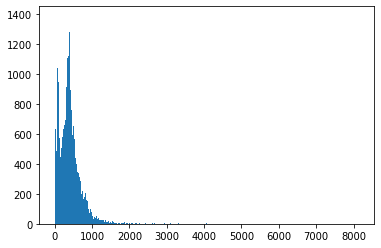

In [40]:
plt.hist([len(l) for l in x], bins=700)
plt.show()

In [41]:
#nos=np.array([len(l) for l in x])
#len(nos[nos>1000])

In [102]:
maxlen=1000
l=pad_sequences(x, maxlen=maxlen)
len(l[0])

1000

In [ ]:
vocab_size=len(tokenizer.word_index)+1
vocab=tokenizer.word_index
def get_weight_matrix(model):
    weight_matrix=np.zeros((vocab_size, DIM))
    for word, i in vocab.items():
        weight_matrix[i]=model.wv[word]
    return weight_matrix


In [ ]:
e=get_weight_matrix(w2v_model)

DIM

In [ ]:
DIM
e

In [ ]:
e.shape

In [ ]:
model=Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights=[e], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

In [ ]:
x_train, x_test, y_test, y_train=train_test_split(x, y)
model.fit(x_train, y_train, validation_split=0.3, epochs=6)

In [ ]:
y_pred=(model.predict(x_test)>=0.5).astype(int)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

x=['this is a news']
x_test
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x, maxlen=maxlen)
(model.predict(x)>=0.5).astype(int)